# alpha Cen B analysis using quadratic detrending

See <tt>aCenB_coherence_linear.ipynb</tt> for an explanation of each step. This is basically the same workflow, just with quadratic detrending. We think the quadratic detrending removes real signal, mainly because segment 2 covers only 2 rotation periods even though it's the part of the time series with the strongest rotational modulation.

This notebook was designed to be quick and dirty, so the frequency grid only goes up to 0.2 cycles/day instead of 0.4 cycles/day as in the paper.

We haven't done any rigorous analysis on the statistical effects of quadratically detrending the Welch's segments. Use quadratic detrending at your own risk.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

import sys
sys.path.insert(0, '/Users/sdr/NWelch/src/')

import TimeSeries
import Bivariate as Bi

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", "font.sans-serif":"Arial"})

In [2]:
mjd, rv, erv, bis, fwhm, rhk = np.loadtxt('Dumusque2012_aCenB_Rv.txt', unpack=True, usecols=[0,1,3,4,5,7])

In [3]:
binary_motion = np.poly1d(np.polyfit(mjd, rv, 2, w=1/erv))
rv_d = rv - binary_motion(mjd)

In [4]:
rv_ts = TimeSeries.TimeSeries(mjd, rv_d)
rhk_ts = TimeSeries.TimeSeries(mjd, rhk, display_frequency_info=False)
fwhm_ts = TimeSeries.TimeSeries(mjd, fwhm, display_frequency_info=False)
bis_ts = TimeSeries.TimeSeries(mjd, bis, display_frequency_info=False)

Nyquist frequency from mean dt: 0.18609
Nyquist frequency from 10% trimmed mean dt: 0.90580
Nyquist frequency from 20% trimmed mean dt: 1.05915
Nyquist frequency from median dt: 3.08605
Rayleigh resolution: 0.00081


In [5]:
rv_ts.frequency_grid(0.2, oversample=6)
rhk_ts.frequency_grid(0.2, oversample=6)
fwhm_ts.frequency_grid(0.2, oversample=6)
bis_ts.frequency_grid(0.2, oversample=6)

### Quadratic detrending

In [6]:
rv_ts.pow_FT(trend_type='quadratic', N_bootstrap=1000)
rhk_ts.pow_FT(trend_type='quadratic', N_bootstrap=1000)
fwhm_ts.pow_FT(trend_type='quadratic', N_bootstrap=1000)
bis_ts.pow_FT(trend_type='quadratic', N_bootstrap=1000)

Iteration 0
Iteration 500
Iteration 0
Iteration 500
Iteration 0
Iteration 500
Iteration 0
Iteration 500


/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


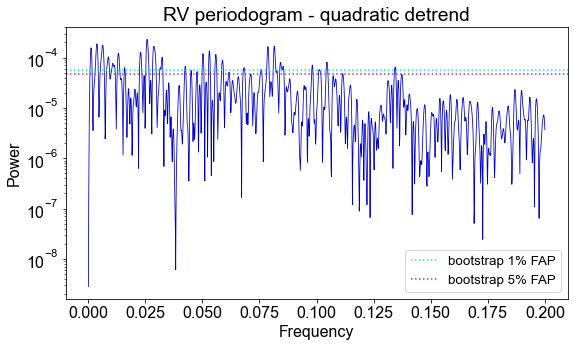

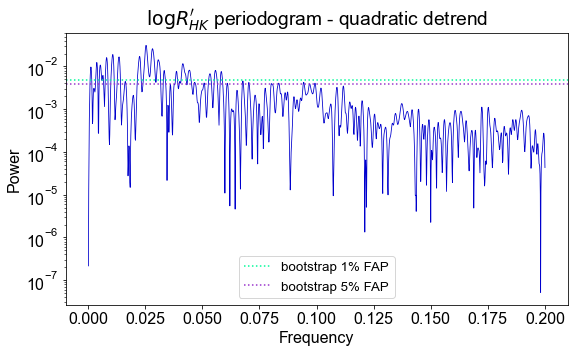

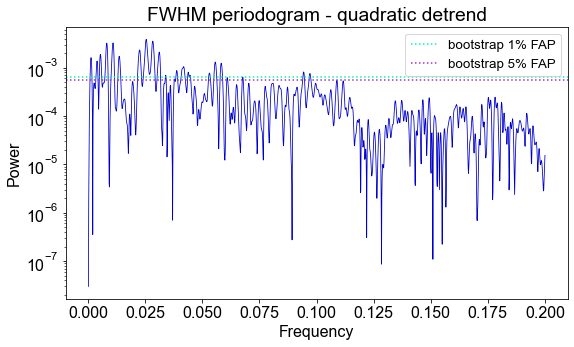

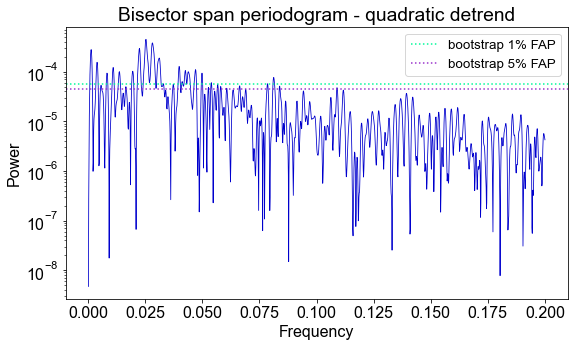

In [7]:
rv_ts.powplot(title='RV periodogram - quadratic detrend')
rhk_ts.powplot(title=r"$\log R^{\prime}_{HK}$ periodogram - quadratic detrend")
fwhm_ts.powplot(title='FWHM periodogram - quadratic detrend')
bis_ts.powplot(title='Bisector span periodogram - quadratic detrend')

In [8]:
rv_ts.save_standard('RV_periodogram_detrend_quadratic.csv')

/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
seg1 = np.where(rv_ts.t < 600)[0]
seg2 = np.where((rv_ts.t > 650) & (rv_ts.t < 900))[0]
seg3 = np.where(rv_ts.t > 1000)[0]
print(seg1[0], seg1[-1])
print(seg2[0], seg2[-1])
print(seg3[0], seg3[-1])

0 184
185 304
305 458


In [10]:
segs = np.array([[0,185], [185,305], [305,459]])

In [11]:
rv_rhk = Bi.Bivariate(mjd, rv, rhk)
rv_fwhm = Bi.Bivariate(mjd, rv, fwhm)
rv_bis = Bi.Bivariate(mjd, rv, bis)
rhk_fwhm = Bi.Bivariate(mjd, rhk, fwhm)
rhk_bis = Bi.Bivariate(mjd, rhk, bis)
fwhm_bis = Bi.Bivariate(mjd, fwhm, bis)

Nyquist frequency from mean dt: 0.18609
Nyquist frequency from 10% trimmed mean dt: 0.90580
Nyquist frequency from 20% trimmed mean dt: 1.05915
Nyquist frequency from median dt: 3.08605
Rayleigh resolution: 0.00081
Nyquist frequency from mean dt: 0.18609
Nyquist frequency from 10% trimmed mean dt: 0.90580
Nyquist frequency from 20% trimmed mean dt: 1.05915
Nyquist frequency from median dt: 3.08605
Rayleigh resolution: 0.00081
Nyquist frequency from mean dt: 0.18609
Nyquist frequency from 10% trimmed mean dt: 0.90580
Nyquist frequency from 20% trimmed mean dt: 1.05915
Nyquist frequency from median dt: 3.08605
Rayleigh resolution: 0.00081
Nyquist frequency from mean dt: 0.18609
Nyquist frequency from 10% trimmed mean dt: 0.90580
Nyquist frequency from 20% trimmed mean dt: 1.05915
Nyquist frequency from median dt: 3.08605
Rayleigh resolution: 0.00081
Nyquist frequency from mean dt: 0.18609
Nyquist frequency from 10% trimmed mean dt: 0.90580
Nyquist frequency from 20% trimmed mean dt: 1.05

In [12]:
rv_rhk.segment_data(segs, 0.2, oversample=6)
rv_fwhm.segment_data(segs, 0.2, oversample=6)
rv_bis.segment_data(segs, 0.2, oversample=6)
rhk_fwhm.segment_data(segs, 0.2, oversample=6)
rhk_bis.segment_data(segs, 0.2, oversample=6)
fwhm_bis.segment_data(segs, 0.2, oversample=6)

Number of segments: 3
Segment start and end points: [[  0 185]
 [185 305]
 [305 459]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000321
Minimum 6-dB bandwidth: 0.002311
Mean 6-dB bandwidth, resolution limit: 0.007666
Best achievable Rayleigh resolution: 0.001910
Number of segments: 3
Segment start and end points: [[  0 185]
 [185 305]
 [305 459]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000321
Minimum 6-dB bandwidth: 0.002311
Mean 6-dB bandwidth, resolution limit: 0.007666
Best achievable Rayleigh resolution: 0.001910
Number of segments: 3
Segment start and end points: [[  0 185]
 [185 305]
 [305 459]]
Effective number of segments: 3.000000
Frequency grid spacing: 0.000321
Minimum 6-dB bandwidth: 0.002311
Mean 6-dB bandwidth, resolution limit: 0.007666
Best achievable Rayleigh resolution: 0.001910
Number of segments: 3
Segment start and end points: [[  0 185]
 [185 305]
 [305 459]]
Effective number of segments: 3.000000
Frequency grid spaci

In [13]:
rv_rhk.Welch_coherence_powspec(trend_type='quadratic')
rv_fwhm.Welch_coherence_powspec(trend_type='quadratic')
rv_bis.Welch_coherence_powspec(trend_type='quadratic')
rhk_fwhm.Welch_coherence_powspec(trend_type='quadratic')
rhk_bis.Welch_coherence_powspec(trend_type='quadratic')
fwhm_bis.Welch_coherence_powspec(trend_type='quadratic')

In [14]:
rv_rhk.Welch_coherence_powspec_bootstrap()
rv_fwhm.Welch_coherence_powspec_bootstrap()
rv_bis.Welch_coherence_powspec_bootstrap()
rhk_fwhm.Welch_coherence_powspec_bootstrap()
rhk_bis.Welch_coherence_powspec_bootstrap()
fwhm_bis.Welch_coherence_powspec_bootstrap()

/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500

Mean number of false-alarm threshold crossings per Rayleigh resolution from bootstrap simulations:
5% FAP: 0.265
1% FAP: 0.104
0.1% FAP: 0.037

Number of false-alarm threshold crossings per Rayleigh resolution from actual data:
5% FAP: 0.086 crossings =  0.6000 %ile
1% FAP: 0.010 crossings =  0.4450 %ile
0.1% FAP: 0.038 crossings =  0.6000 %ile

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500

Mean number of false-alarm threshold crossings per Rayleig

In [15]:
rv_rhk.save_results("aCenB_D12_rv_rhk_coherence_detrend_quadratic.csv")
rv_fwhm.save_results("aCenB_D12_rv_fwhm_coherence_detrend_quadratic.csv")
rv_bis.save_results("aCenB_D12_rv_bis_coherence_detrend_quadratic.csv")
rhk_fwhm.save_results("aCenB_D12_rhk_fwhm_coherence_detrend_quadratic.csv")
rhk_bis.save_results("aCenB_D12_rhk_bis_coherence_detrend_quadratic.csv")
fwhm_bis.save_results("aCenB_D12_fwhm_bis_coherence_detrend_quadratic.csv")

/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
frot_fwhm = rhk_fwhm.pow_coh_grid[np.argmax(rhk_fwhm.y_series.Welch_pow)]
print('Rotation period (FWHM, days):', 1/frot_fwhm)

frot_bis = rhk_bis.pow_coh_grid[np.argmax(rhk_bis.y_series.Welch_pow)]
print('Rotation period (BIS, days):', 1/frot_bis)

frot_rhk = rhk_bis.pow_coh_grid[np.argmax(rhk_bis.x_series.Welch_pow)]
print('Rotation period (RHK, days):', 1/frot_rhk)

frot_ave = np.mean([frot_rhk, frot_bis, frot_fwhm])
print('Rotation period (averaged):', 1/frot_ave)

Rotation period (FWHM, days): 38.51851851851853
Rotation period (BIS, days): 38.51851851851853
Rotation period (RHK, days): 38.51851851851853
Rotation period (averaged): 38.51851851851853


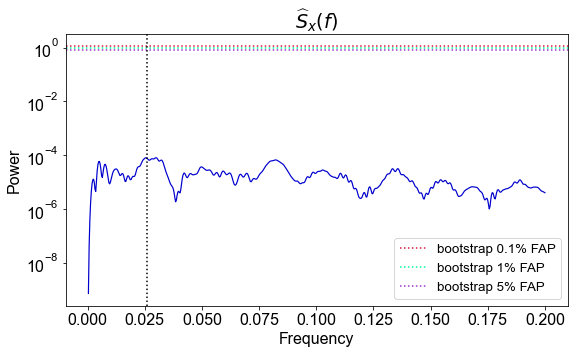

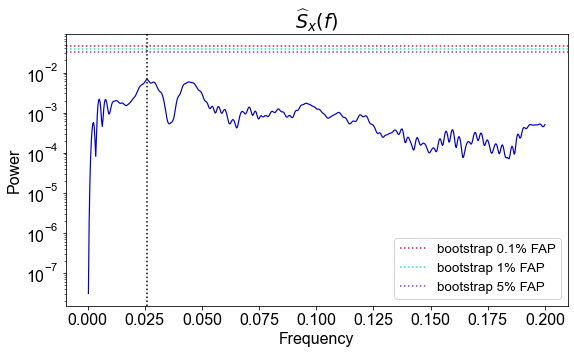

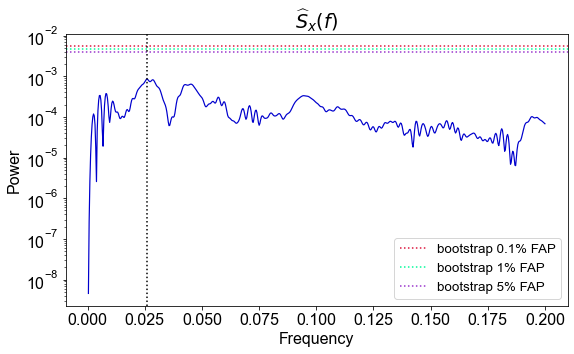

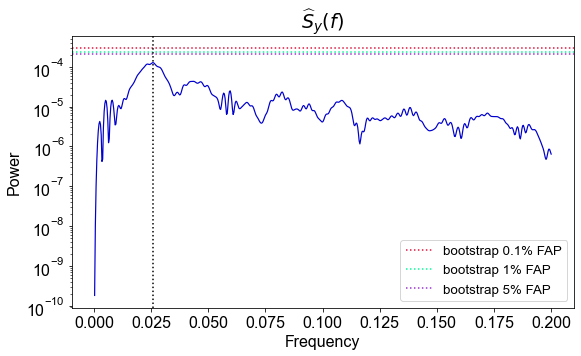

In [17]:
# RV power spectrum
rv_rhk.Welch_pow_plot(vlines=[frot_ave], lw=1.2)

# log R'HK power spectrum
rhk_fwhm.Welch_pow_plot(vlines=[frot_ave], lw=1.2)

# FWHM power spectrum
fwhm_bis.Welch_pow_plot(vlines=[frot_ave], lw=1.2)

# BIS power spectrum
rv_bis.Welch_pow_plot(x_or_y='y', vlines=[frot_ave], lw=1.2)

In [93]:
rv_rhk.Siegel_Welch(tri=True)
fwhm_bis.Siegel_Welch(tri=True)

Siegel's test on Gxx:
T statistic: 0.00927
T threshold for rejecting white noise hypothesis at 5% level: 0.03529
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Gyy:
T statistic: 0.06355
T threshold for rejecting white noise hypothesis at 5% level: 0.03529
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities
Siegel's test on Gxx:
T statistic: 0.03186
T threshold for rejecting white noise hypothesis at 5% level: 0.03529
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Gyy:
T statistic: 0.14514
T threshold for rejecting white noise hypothesis at 5% level: 0.03529
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities


/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


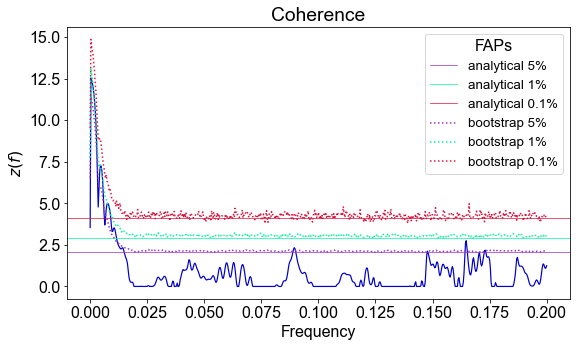

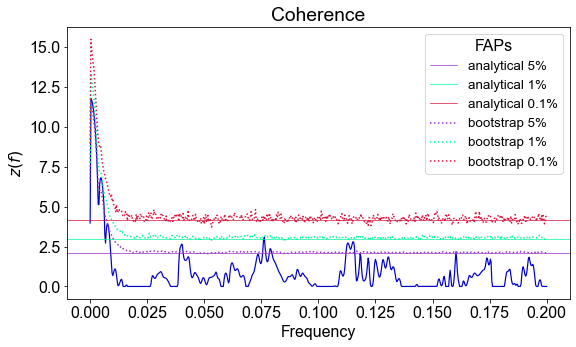

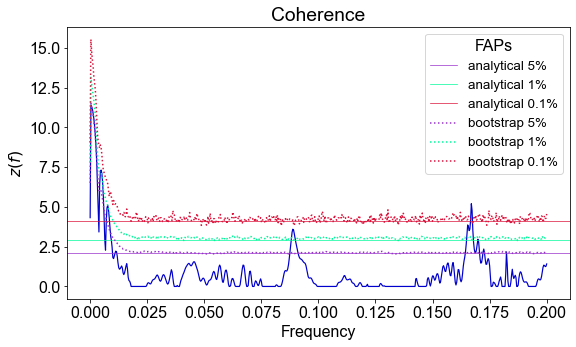

In [54]:
rv_rhk.coh_plot(show_theoretical_thresholds=True, transformed=True, lw=1.2)
rv_bis.coh_plot(show_theoretical_thresholds=True, transformed=True, lw=1.2)
rv_fwhm.coh_plot(show_theoretical_thresholds=True, transformed=True, lw=1.2)

In [55]:
candidates_rhk = np.where(rv_rhk.coh > rv_rhk.coh_prob_5)[0]
candidates_bis = np.where(rv_bis.coh > rv_bis.coh_prob_5)[0]
candidates_fw = np.where(rv_fwhm.coh > rv_fwhm.coh_prob_5)[0]
print('Frequencies of candidate stellar signals from RV-RHK coherence (1/days):', rv_rhk.pow_coh_grid[candidates_rhk])
print('Frequencies of candidate stellar signals from RV-BIS coherence (1/days):', rv_bis.pow_coh_grid[candidates_bis])
print('\nFrequencies of candidate stellar signals from RV-FWHM coherence (1/days):', rv_fwhm.pow_coh_grid[candidates_fw])

Frequencies of candidate stellar signals from RV-RHK coherence (1/days): [0.         0.00032051 0.00064103 0.00096154 0.00128205 0.00160256
 0.00192308 0.00224359 0.0025641  0.00288462 0.00320513 0.00352564
 0.00384615 0.00416667 0.00448718 0.00480769 0.00512821 0.00544872
 0.00576923 0.00608974 0.00641026 0.00673077 0.00705128 0.00737179
 0.00769231 0.00801282 0.00833333 0.00865385 0.00897436 0.00929487
 0.00961538 0.0099359  0.01025641 0.01057692 0.01089744 0.01121795
 0.01153846 0.01185897 0.01217949 0.0125     0.01282051 0.01314103
 0.01346154 0.01378205 0.01410256 0.01442308 0.01474359 0.08910256
 0.08942308 0.08974359 0.14775641 0.16442308 0.16474359 0.1650641
 0.17275641 0.17307692]
Frequencies of candidate stellar signals from RV-BIS coherence (1/days): [0.         0.00032051 0.00064103 0.00096154 0.00128205 0.00160256
 0.00192308 0.00224359 0.0025641  0.00288462 0.00320513 0.00352564
 0.00384615 0.00416667 0.00448718 0.00480769 0.00512821 0.00544872
 0.00576923 0.00608974 0.00

/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


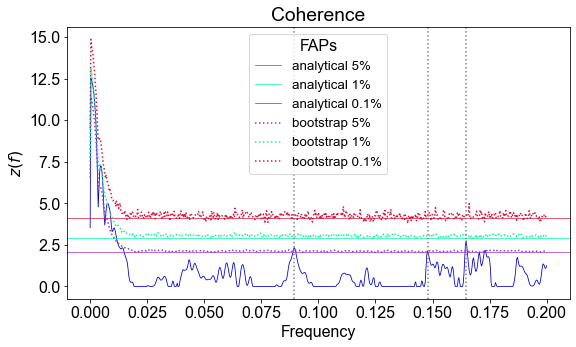

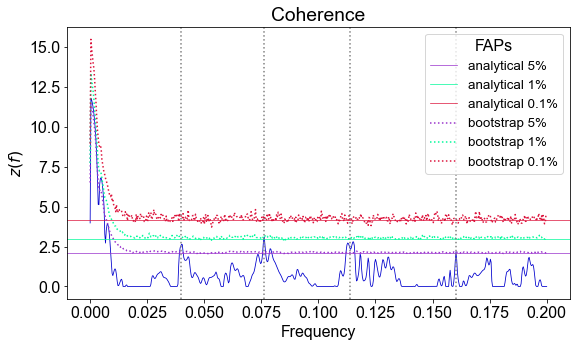

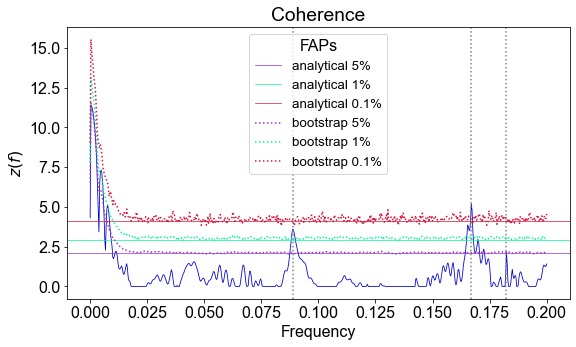

In [83]:
vlines_rhk = [0.0894, 0.148, 0.1645]
rv_rhk.coh_plot(show_theoretical_thresholds=True, transformed=True, vlines=vlines_rhk)

vlines_bis = [0.04, 0.076, 0.114, 0.1602]
rv_bis.coh_plot(show_theoretical_thresholds=True, transformed=True, vlines=vlines_bis)

vlines_fw = [0.089, 0.167, 0.182]
rv_fwhm.coh_plot(show_theoretical_thresholds=True, transformed=True, vlines=vlines_fw)

/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


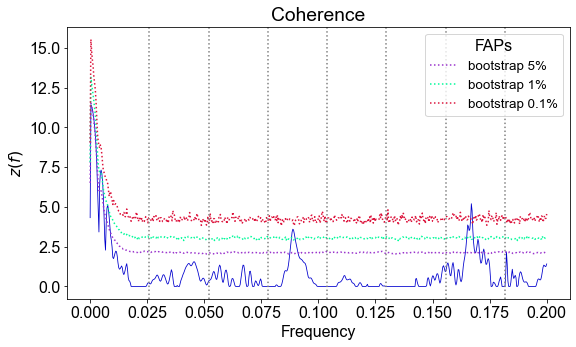

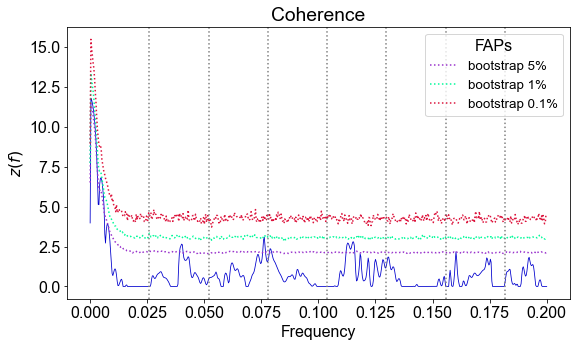

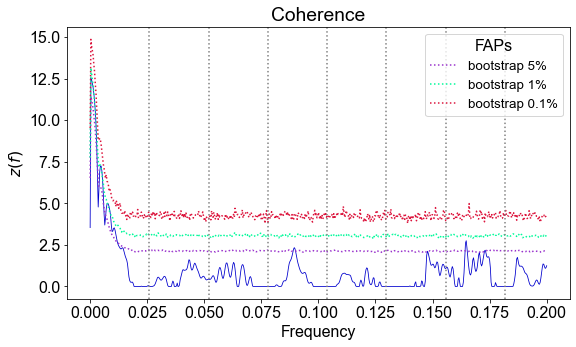

In [59]:
harmonics = [frot_ave*i for i in range(1,8)]

rv_fwhm.coh_plot(transformed=True, vlines=harmonics)
rv_bis.coh_plot(transformed=True, vlines=harmonics)
rv_rhk.coh_plot(transformed=True, vlines=harmonics)

/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


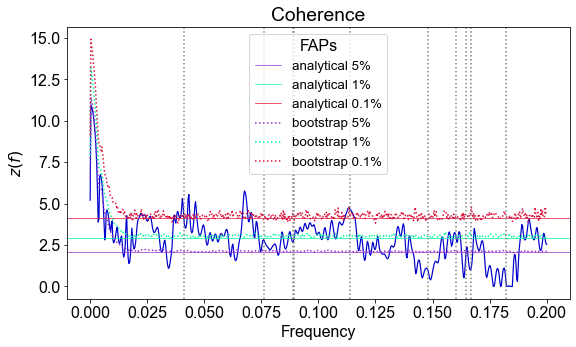

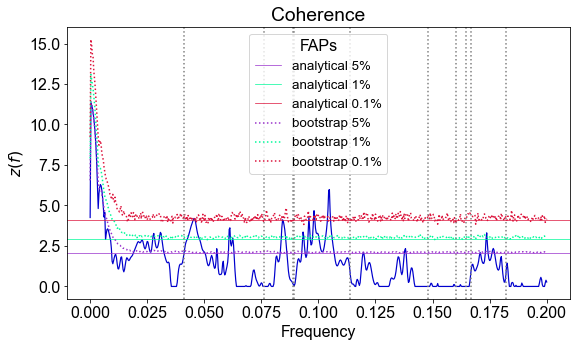

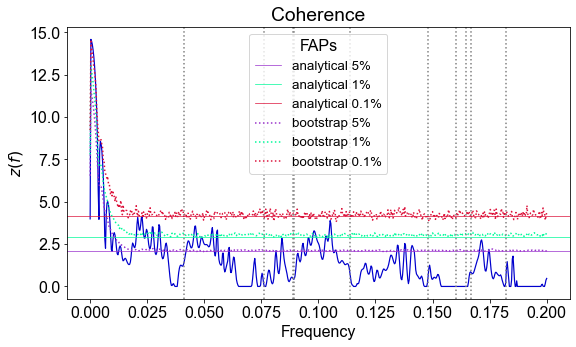

In [60]:
rhk_fwhm.coh_plot(show_theoretical_thresholds=True, transformed=True, vlines=vlines_rhk+vlines_fw+vlines_bis, lw=1.2)
rhk_bis.coh_plot(show_theoretical_thresholds=True, transformed=True, vlines=vlines_rhk+vlines_fw+vlines_bis, lw=1.2)
fwhm_bis.coh_plot(show_theoretical_thresholds=True, transformed=True, vlines=vlines_rhk+vlines_fw+vlines_bis, lw=1.2)

/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


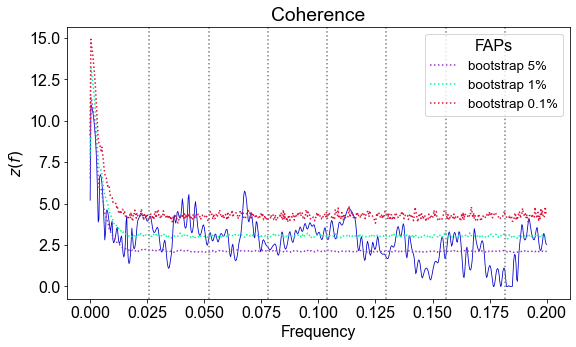

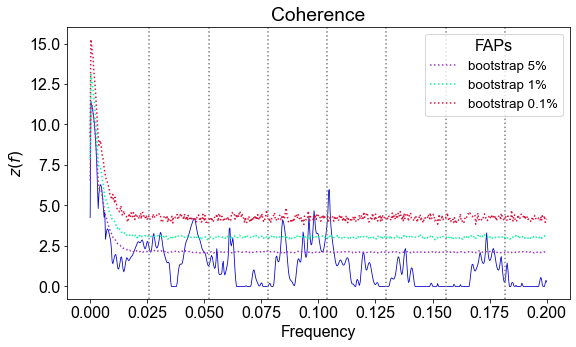

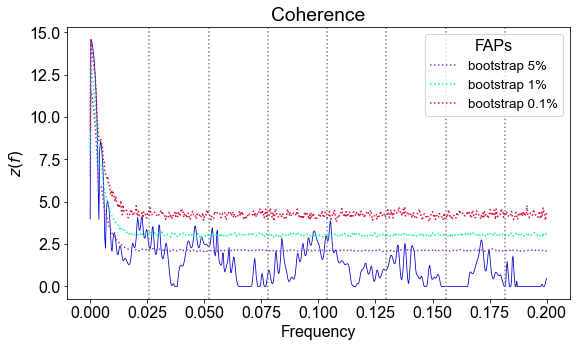

In [61]:
rhk_fwhm.coh_plot(transformed=True, vlines=harmonics)
rhk_bis.coh_plot(transformed=True, vlines=harmonics)
fwhm_bis.coh_plot(transformed=True, vlines=harmonics)

/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


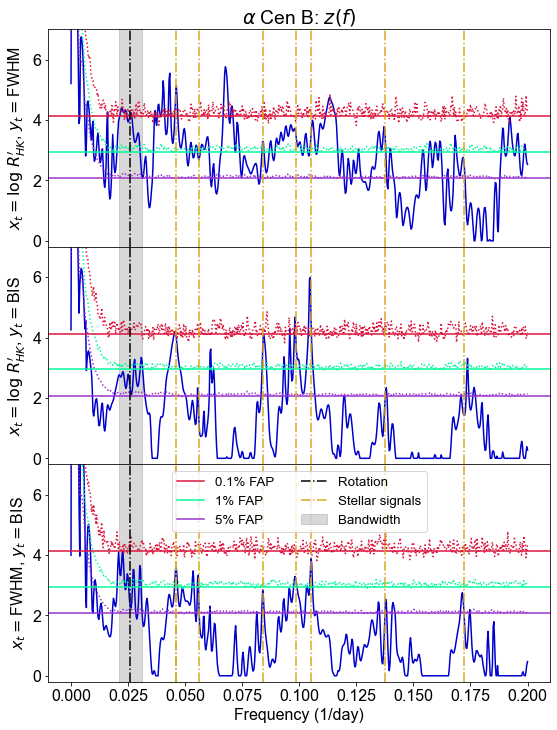

In [86]:
# shared = [0.0985, 0.1375, 0.1785, 0.046]
shared = [0.0985, 0.084, 0.105, 0.046, 0.056, 0.1375, 0.172]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(9,12))

ax1.plot(rhk_fwhm.pow_coh_grid, rhk_fwhm.coh_transformed, color='mediumblue')
ax1.plot(rhk_fwhm.pow_coh_grid, rhk_fwhm.coh_transformed_boot_5, color='darkorchid', ls=':')
ax1.plot(rhk_fwhm.pow_coh_grid, rhk_fwhm.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax1.plot(rhk_fwhm.pow_coh_grid, rhk_fwhm.coh_transformed_boot_01, color='crimson', ls=':')
ax1.axhline(Bi.ztrans(rhk_fwhm.coh_prob_01, rhk_fwhm.Nseg_eff), color='crimson', label='0.1% FAP')
ax1.axhline(Bi.ztrans(rhk_fwhm.coh_prob_1, rhk_fwhm.Nseg_eff), color='mediumspringgreen', label='1% FAP')
ax1.axhline(Bi.ztrans(rhk_fwhm.coh_prob_5, rhk_fwhm.Nseg_eff), color='darkorchid', label='5% FAP')
ax1.axvline(frot_ave, ls='-.', color='k', label='Rotation')
ax1.fill_between([frot_ave-bw,frot_ave+bw], [-0.2,-0.2], [7,7], color='gray', alpha=0.3)
for f in shared:
    ax1.axvline(f, ls='-.', color='goldenrod')
    # ax1.fill_between([f-bw,f+bw], [-0.2,-0.2], [7,7], color='gray', alpha=0.5)
# ax1.legend(loc='best', fontsize='x-small')
ax1.set_ylabel(r"$x_t = \log \; R^{\prime}_{HK}$, $y_t =$FWHM")
ax1.set_ylim([-0.2,7])
ax1.set_title(r"$\alpha$ Cen B: $z(f)$")

ax2.plot(rhk_bis.pow_coh_grid, rhk_bis.coh_transformed, color='mediumblue')
ax2.plot(rhk_bis.pow_coh_grid, rhk_bis.coh_transformed_boot_5, color='darkorchid', ls=':')
ax2.plot(rhk_bis.pow_coh_grid, rhk_bis.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax2.plot(rhk_bis.pow_coh_grid, rhk_bis.coh_transformed_boot_01, color='crimson', ls=':')
ax2.axhline(Bi.ztrans(rhk_bis.coh_prob_01, rhk_bis.Nseg_eff), color='crimson', label='0.1% FAP')
ax2.axhline(Bi.ztrans(rhk_bis.coh_prob_1, rhk_bis.Nseg_eff), color='mediumspringgreen', label='1% FAP')
ax2.axhline(Bi.ztrans(rhk_bis.coh_prob_5, rhk_bis.Nseg_eff), color='darkorchid', label='5% FAP')
ax2.axvline(frot_ave, ls='-.', color='k')
ax2.fill_between([frot_ave-bw,frot_ave+bw], [-0.2,-0.2], [7,7], color='gray', alpha=0.3)
for f in shared:
    ax2.axvline(f, ls='-.', color='goldenrod')
    # ax2.fill_between([f-bw,f+bw], [-0.2,-0.2], [7,7], color='gray', alpha=0.5)
ax2.set_ylabel(r"$x_t = \log \; R^{\prime}_{HK}$, $y_t =$BIS")
ax2.set_ylim([-0.2,7])

ax3.plot(fwhm_bis.pow_coh_grid, fwhm_bis.coh_transformed, color='mediumblue')
ax3.plot(fwhm_bis.pow_coh_grid, fwhm_bis.coh_transformed_boot_5, color='darkorchid', ls=':')
ax3.plot(fwhm_bis.pow_coh_grid, fwhm_bis.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax3.plot(fwhm_bis.pow_coh_grid, fwhm_bis.coh_transformed_boot_01, color='crimson', ls=':')
ax3.axhline(Bi.ztrans(fwhm_bis.coh_prob_01, fwhm_bis.Nseg_eff), color='crimson', label='0.1% FAP')
ax3.axhline(Bi.ztrans(fwhm_bis.coh_prob_1, fwhm_bis.Nseg_eff), color='mediumspringgreen', label='1% FAP')
ax3.axhline(Bi.ztrans(fwhm_bis.coh_prob_5, fwhm_bis.Nseg_eff), color='darkorchid', label='5% FAP')
ax3.axvline(frot_ave, ls='-.', color='k', label='Rotation')
ax3.fill_between([frot_ave-bw,frot_ave+bw], [-0.2,-0.2], [7,7], color='gray', alpha=0.3, label='Bandwidth')
for f in shared:
    ax3.axvline(f, ls='-.', color='goldenrod')
    # ax3.fill_between([f-bw,f+bw], [-0.2,-0.2], [7,7], color='gray', alpha=0.5)
ax3.axvline(shared[3], ls='-.', color='goldenrod', label='Stellar signals')
ax3.legend(loc='upper center', fontsize='small', ncol=2)
ax3.set_ylabel(r"$x_t =$FWHM, $y_t =$BIS")
ax3.set_ylim([-0.2,7])
ax3.set_xlabel('Frequency (1/day)')

plt.subplots_adjust(hspace=0)

/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


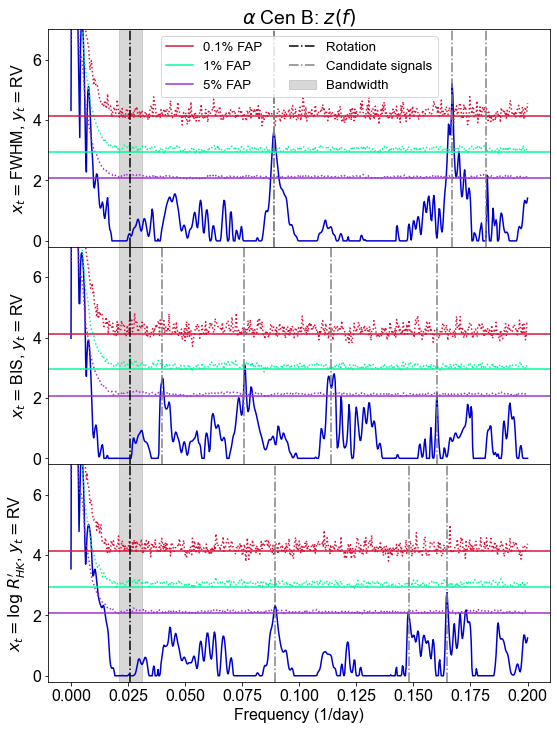

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(9,12))

ax1.plot(rv_fwhm.pow_coh_grid, rv_fwhm.coh_transformed, color='mediumblue')
ax1.plot(rv_fwhm.pow_coh_grid, rv_fwhm.coh_transformed_boot_5, color='darkorchid', ls=':')
ax1.plot(rv_fwhm.pow_coh_grid, rv_fwhm.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax1.plot(rv_fwhm.pow_coh_grid, rv_fwhm.coh_transformed_boot_01, color='crimson', ls=':')
ax1.axhline(Bi.ztrans(rv_fwhm.coh_prob_01, rv_fwhm.Nseg_eff), color='crimson', label='0.1% FAP')
ax1.axhline(Bi.ztrans(rv_fwhm.coh_prob_1, rv_fwhm.Nseg_eff), color='mediumspringgreen', label='1% FAP')
ax1.axhline(Bi.ztrans(rv_fwhm.coh_prob_5, rv_fwhm.Nseg_eff), color='darkorchid', label='5% FAP')
ax1.axvline(frot_ave, ls='-.', color='k', label='Rotation')
ax1.axvline(vlines_fw[0], color='gray', ls='-.', label='Candidate signals')
ax1.fill_between([frot_ave-bw,frot_ave+bw], [-0.2,-0.2], [7,7], color='gray', alpha=0.3, label='Bandwidth')
for f in vlines_fw:
    ax1.axvline(f, ls='-.', color='gray')
ax1.legend(loc='upper center', fontsize='small', ncol=2)
ax1.set_ylabel(r"$x_t =$FWHM, $y_t =$RV")
ax1.set_ylim([-0.2,7])
ax1.set_title(r"$\alpha$ Cen B: $z(f)$")

ax2.plot(rv_bis.pow_coh_grid, rv_bis.coh_transformed, color='mediumblue')
ax2.plot(rv_bis.pow_coh_grid, rv_bis.coh_transformed_boot_5, color='darkorchid', ls=':')
ax2.plot(rv_bis.pow_coh_grid, rv_bis.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax2.plot(rv_bis.pow_coh_grid, rv_bis.coh_transformed_boot_01, color='crimson', ls=':')
ax2.axhline(Bi.ztrans(rv_bis.coh_prob_01, rv_bis.Nseg_eff), color='crimson', label='0.1% FAP')
ax2.axhline(Bi.ztrans(rv_bis.coh_prob_1, rv_bis.Nseg_eff), color='mediumspringgreen', label='1% FAP')
ax2.axhline(Bi.ztrans(rv_bis.coh_prob_5, rv_bis.Nseg_eff), color='darkorchid', label='5% FAP')
ax2.axvline(frot_ave, ls='-.', color='k')
ax2.fill_between([frot_ave-bw,frot_ave+bw], [-0.2,-0.2], [7,7], color='gray', alpha=0.3)
for f in vlines_bis:
    ax2.axvline(f, ls='-.', color='gray')
ax2.set_ylabel(r"$x_t =$BIS, $y_t =$RV")
ax2.set_ylim([-0.2,7])

ax3.plot(rv_rhk.pow_coh_grid, rv_rhk.coh_transformed, color='mediumblue')
ax3.plot(rv_rhk.pow_coh_grid, rv_rhk.coh_transformed_boot_5, color='darkorchid', ls=':')
ax3.plot(rv_rhk.pow_coh_grid, rv_rhk.coh_transformed_boot_1, color='mediumspringgreen', ls=':')
ax3.plot(rv_rhk.pow_coh_grid, rv_rhk.coh_transformed_boot_01, color='crimson', ls=':')
ax3.axhline(Bi.ztrans(rv_rhk.coh_prob_01, rv_rhk.Nseg_eff), color='crimson', label='0.1% FAP')
ax3.axhline(Bi.ztrans(rv_rhk.coh_prob_1, rv_rhk.Nseg_eff), color='mediumspringgreen', label='1% FAP')
ax3.axhline(Bi.ztrans(rv_rhk.coh_prob_5, rv_rhk.Nseg_eff), color='darkorchid', label='5% FAP')
ax3.axvline(frot_ave, ls='-.', color='k')
ax3.fill_between([frot_ave-bw,frot_ave+bw], [-0.2,-0.2], [7, 7], color='gray', alpha=0.3)
for f in vlines_rhk:
    ax3.axvline(f, ls='-.', color='gray')
ax3.set_ylabel(r"$x_t = \log \; R^{\prime}_{HK}$, $y_t =$RV")
ax3.set_ylim([-0.2,7])
ax3.set_xlabel('Frequency (1/day)')

plt.subplots_adjust(hspace=0)

In [38]:
print(shared/frot_ave)

[3.79407407 3.23555556 4.04444444 1.77185185]


/Users/sdr/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
nf = 0.2 / rv_ts.Nyq_meandt
faps = [0.05, 0.01]

rv_ls = LombScargle(mjd, rv_d, normalization='psd')
rhk_ls = LombScargle(mjd, rhk, normalization='psd')
fw_ls = LombScargle(mjd, fwhm, normalization='psd')
bis_ls = LombScargle(mjd, bis, normalization='psd')

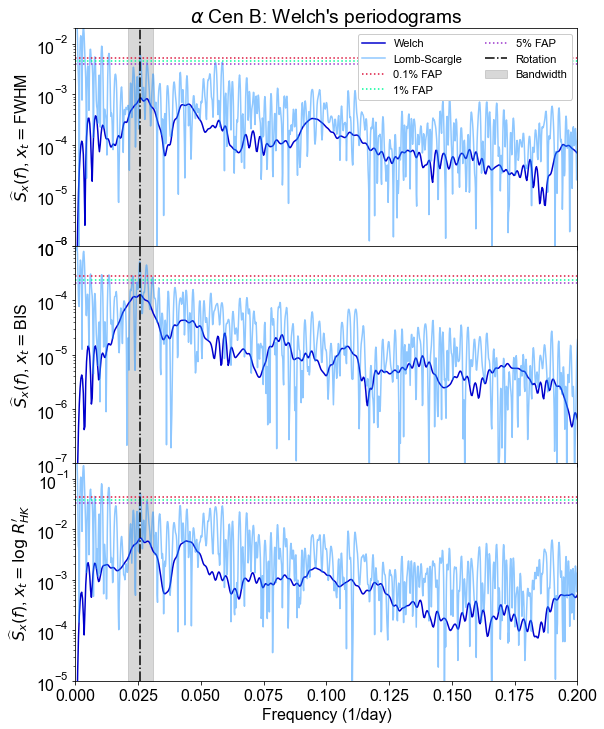

In [90]:
bw = 0.00513

frhk, powrhk = rhk_ls.autopower(nyquist_factor=nf)
ffw, powfw = fw_ls.autopower(nyquist_factor=nf)
fbis, powbis = bis_ls.autopower(nyquist_factor=nf)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(9,12))

ax1.semilogy(rhk_fwhm.pow_coh_grid[2:], rhk_fwhm.y_series.Welch_pow[2:], color='mediumblue', label='Welch')
ax1.semilogy(ffw, powfw, color='dodgerblue', alpha=0.5, label='Lomb-Scargle')
ax1.axhline(rhk_fwhm.ypow_Welch_false_alarm_01, color='crimson', ls=':', label='0.1% FAP')
ax1.axhline(rhk_fwhm.ypow_Welch_false_alarm_1, color='mediumspringgreen', ls=':', label='1% FAP')
ax1.axhline(rhk_fwhm.ypow_Welch_false_alarm_5, color='darkorchid', ls=':', label='5% FAP')
ax1.axvline(frot_ave, color='k', ls='-.', label='Rotation')
ax1.set_title(r"$\alpha$ Cen B: Welch's periodograms")
ax1.set_ylabel(r"$\widehat{S}_x(f)$, $x_t =$FWHM")
ax1.fill_between([frot_ave-bw,frot_ave+bw], [1e-6,1e-6], [2e-2, 2e-2], color='gray', alpha=0.3, label='Bandwidth')
# ax1.legend(loc=(0.78,0.55), fontsize='x-small', ncol=2)
ax1.legend(loc='upper right', fontsize='x-small', ncol=2, facecolor='white', framealpha=1)
# ax1.grid(color='0.85')
ax1.set_ylim([1e-6,2e-2])

ax2.semilogy(rhk_bis.pow_coh_grid[2:], rhk_bis.y_series.Welch_pow[2:], color='mediumblue')
ax2.semilogy(fbis, powbis, color='dodgerblue', alpha=0.5)
ax2.axhline(rhk_bis.ypow_Welch_false_alarm_01, color='crimson', ls=':')
ax2.axhline(rhk_bis.ypow_Welch_false_alarm_1, color='mediumspringgreen', ls=':')
ax2.axhline(rhk_bis.ypow_Welch_false_alarm_5, color='darkorchid', ls=':')
ax2.axvline(frot_ave, color='k', ls='-.')
ax2.set_ylabel(r"$\widehat{S}_x(f)$, $x_t =$BIS")
# ax2.grid(color='0.85')
ax2.set_ylim([1e-7,1e-3])
ax2.fill_between([frot_ave-bw,frot_ave+bw], [1e-7,1e-7], [1e-3, 1e-3], color='gray', alpha=0.3)


ax3.semilogy(rhk_bis.pow_coh_grid[2:], rhk_bis.x_series.Welch_pow[2:], color='mediumblue')
ax3.semilogy(frhk, powrhk, color='dodgerblue', alpha=0.5)
ax3.axhline(rhk_bis.xpow_Welch_false_alarm_01, color='crimson', ls=':')
ax3.axhline(rhk_bis.xpow_Welch_false_alarm_1, color='mediumspringgreen', ls=':')
ax3.axhline(rhk_bis.xpow_Welch_false_alarm_5, color='darkorchid', ls=':')
ax3.axvline(frot_ave, color='k', ls='-.')
ax3.set_ylabel(r"$\widehat{S}_x(f)$, $x_t = \log \; R^{\prime}_{HK}$")
ax3.set_xlabel("Frequency (1/day)")
# ax3.grid(color='0.85')
ax3.set_ylim([1e-5,2e-1])
ax3.set_xlim([0,0.2])
ax3.fill_between([frot_ave-bw,frot_ave+bw], [1e-5,1e-5], [2e-1, 2e-1], color='gray', alpha=0.3)

plt.subplots_adjust(hspace=0)

In [92]:
print(frot_ave)

0.025961538461538453


In [94]:
print(shared)

[0.0985, 0.084, 0.105, 0.046, 0.056, 0.1375, 0.172]
